In [45]:
import pandas as pd
import matplotlib.pyplot as plt

request_stats = pd.read_csv("../output/request_stats.csv")

In [46]:
request_stats.head()

,debug,id,tick,current_node,next_node,target_node,status,processing_progress,qos_limit,size,priority,creation_time,last_status_change,status_history,path,path_index,get_tick,tick_time
0,False,0,33,LEO 0,LEO 0,LEO 0,RequestStatus.COMPLETED,5000000.0,0.5,5000000.0,Priority.MEDIUM,33,35,"[(<RequestStatus.CREATED: 0>, 33.0), (<Request...",[<optimisation_ntn.nodes.user_device.UserDevic...,3,<bound method Simulation.get_current_tick of <...,0.1
1,False,1,58,LEO 0,LEO 0,LEO 0,RequestStatus.COMPLETED,10000000.0,1.0,9000000.0,Priority.LOW,58,61,"[(<RequestStatus.CREATED: 0>, 58.0), (<Request...",[<optimisation_ntn.nodes.user_device.UserDevic...,3,<bound method Simulation.get_current_tick of <...,0.1
2,False,2,123,LEO 0,LEO 0,LEO 0,RequestStatus.COMPLETED,5000000.0,0.2,3000000.0,Priority.HIGH,123,125,"[(<RequestStatus.CREATED: 0>, 123.0), (<Reques...",[<optimisation_ntn.nodes.user_device.UserDevic...,3,<bound method Simulation.get_current_tick of <...,0.1
3,False,3,126,LEO 0,LEO 0,LEO 0,RequestStatus.COMPLETED,5000000.0,0.2,1000000.0,Priority.HIGH,126,128,"[(<RequestStatus.CREATED: 0>, 126.0), (<Reques...",[<optimisation_ntn.nodes.user_device.UserDevic...,3,<bound method Simulation.get_current_tick of <...,0.1
4,False,4,193,LEO 0,LEO 0,LEO 0,RequestStatus.COMPLETED,5000000.0,0.2,3000000.0,Priority.HIGH,193,195,"[(<RequestStatus.CREATED: 0>, 193.0), (<Reques...",[<optimisation_ntn.nodes.user_device.UserDevic...,3,<bound method Simulation.get_current_tick of <...,0.1


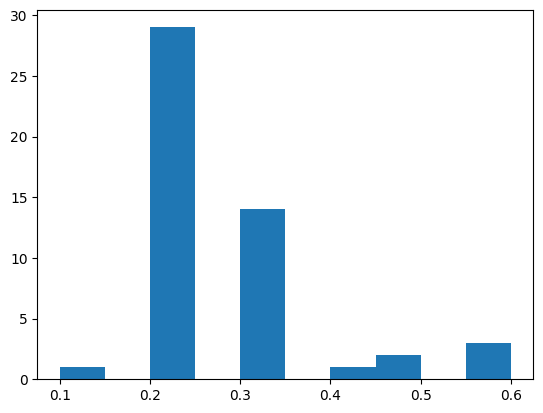

In [47]:
request_tick_time = request_stats["last_status_change"] - request_stats["creation_time"]
request_time = request_tick_time * 0.1

# plot the request time distribution
plt.hist(request_time, bins=10)
plt.show()

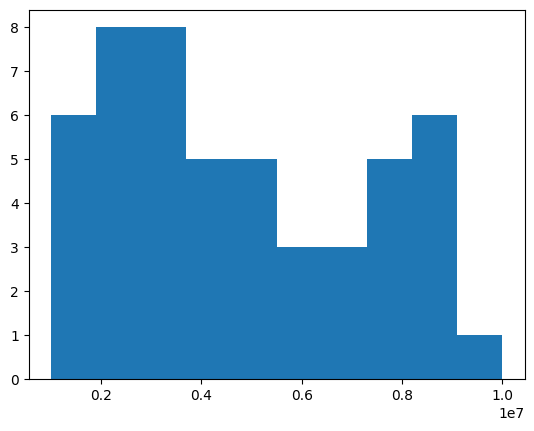

In [48]:
# plot the request size distribution
plt.hist(request_stats["size"], bins=10)
plt.show()

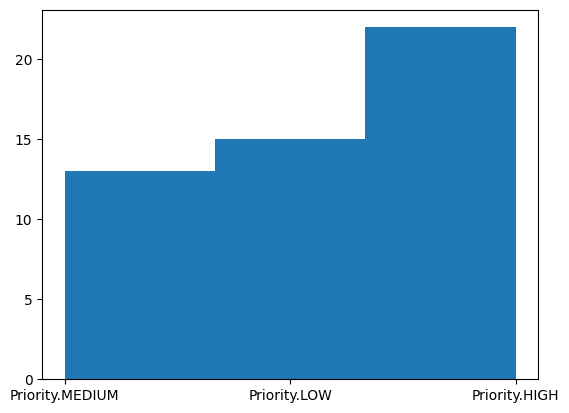

In [49]:
# plot the request priority distribution
plt.hist(request_stats["priority"], bins=3)
plt.show()

In [50]:
# plot the tim